In [1]:
import pandas as pd
import duckdb
from pyspainmobility import Mobility, Zones
import seaborn as sns
import matplotlib.pyplot as plt


Leemos primero los datos de los distritos:

In [2]:
# getting 1 week of mobility data. In this case, we download the data from November 13 to November 19 in 2023 as it was 2 years ago exactly ensuring it goes from Monday to Sunday.
mobility_data_distritos = Mobility(version=2, zones='distritos', start_date='2023-11-13', end_date='2023-11-19')
# and we extract the OD matrices 
mobility_data_distritos.get_od_data()


Generating parquet file for ODs....


  0%|          | 0/7 [00:00<?, ?it/s]

Processing file: C:\Users\carlo\data\20231113_Viajes_distritos_v2.csv.gz
Reading gzipped file...


 14%|█▍        | 1/7 [01:11<07:06, 71.06s/it]

Processing file: C:\Users\carlo\data\20231114_Viajes_distritos_v2.csv.gz
Reading gzipped file...


 29%|██▊       | 2/7 [02:26<06:08, 73.78s/it]

Processing file: C:\Users\carlo\data\20231115_Viajes_distritos_v2.csv.gz
Reading gzipped file...


 43%|████▎     | 3/7 [03:41<04:57, 74.27s/it]

Processing file: C:\Users\carlo\data\20231116_Viajes_distritos_v2.csv.gz
Reading gzipped file...


 57%|█████▋    | 4/7 [04:47<03:33, 71.11s/it]

Processing file: C:\Users\carlo\data\20231117_Viajes_distritos_v2.csv.gz
Reading gzipped file...


 71%|███████▏  | 5/7 [05:57<02:21, 70.63s/it]

Processing file: C:\Users\carlo\data\20231118_Viajes_distritos_v2.csv.gz
Reading gzipped file...


 86%|████████▌ | 6/7 [07:00<01:07, 67.83s/it]

Processing file: C:\Users\carlo\data\20231119_Viajes_distritos_v2.csv.gz
Reading gzipped file...


100%|██████████| 7/7 [07:54<00:00, 67.73s/it]


Concatenating all the dataframes....
Writing the parquet file....
Parquet file generated successfully at  C:\Users\carlo\data\Viajes_distritos_2023-11-13_2023-11-19_v2.parquet


In [29]:
df_distritos = pd.read_parquet('C:/Users/carlo/data/Viajes_distritos_2023-11-13_2023-11-19_v2.parquet')
print(df_distritos)


                date  hour id_origin id_destination  n_trips  \
0         2023-11-13     0     01001          01001   13.064   
1         2023-11-13     0     01001       01009_AM   16.660   
2         2023-11-13     0     01001       01058_AM    6.720   
3         2023-11-13     0     01001        0105902   10.807   
4         2023-11-13     0     01001        0105903   15.979   
...              ...   ...       ...            ...      ...   
22337972  2023-11-19    23   externo          43901    5.814   
22337973  2023-11-19    23   externo        4801308    1.000   
22337974  2023-11-19    23   externo        4802002    3.460   
22337975  2023-11-19    23   externo       49261_AM    2.488   
22337976  2023-11-19    23   externo        5029707    1.000   

          trips_total_length_km  
0                        52.925  
1                        79.645  
2                        85.175  
3                       153.921  
4                       178.759  
...                        

Luego de los municipios:

In [4]:
# getting 1 week of mobility data. In this case, we download the data from November 13 to November 19 in 2023 as it was 2 years ago exactly ensuring it goes from Monday to Sunday.
mobility_data_municipios = Mobility(version=2, zones='municipios', start_date='2023-11-13', end_date='2023-11-19')
# and we extract the OD matrices 
mobility_data_municipios.get_od_data()

Generating parquet file for ODs....


  0%|          | 0/7 [00:00<?, ?it/s]

Processing file: C:\Users\carlo\data\20231113_Viajes_municipios_v2.csv.gz
Reading gzipped file...


 14%|█▍        | 1/7 [00:44<04:24, 44.09s/it]

Processing file: C:\Users\carlo\data\20231114_Viajes_municipios_v2.csv.gz
Reading gzipped file...


 29%|██▊       | 2/7 [01:22<03:22, 40.55s/it]

Processing file: C:\Users\carlo\data\20231115_Viajes_municipios_v2.csv.gz
Reading gzipped file...


 43%|████▎     | 3/7 [02:01<02:39, 39.80s/it]

Processing file: C:\Users\carlo\data\20231116_Viajes_municipios_v2.csv.gz
Reading gzipped file...


 57%|█████▋    | 4/7 [02:47<02:06, 42.32s/it]

Processing file: C:\Users\carlo\data\20231117_Viajes_municipios_v2.csv.gz
Reading gzipped file...


 71%|███████▏  | 5/7 [03:42<01:33, 46.95s/it]

Processing file: C:\Users\carlo\data\20231118_Viajes_municipios_v2.csv.gz
Reading gzipped file...


 86%|████████▌ | 6/7 [04:29<00:47, 47.08s/it]

Processing file: C:\Users\carlo\data\20231119_Viajes_municipios_v2.csv.gz
Reading gzipped file...


100%|██████████| 7/7 [05:09<00:00, 44.23s/it]


Concatenating all the dataframes....
Writing the parquet file....
Parquet file generated successfully at  C:\Users\carlo\data\Viajes_municipios_2023-11-13_2023-11-19_v2.parquet


In [30]:
df_municipios = pd.read_parquet('C:/Users/carlo/data/Viajes_municipios_2023-11-13_2023-11-19_v2.parquet')
print(df_municipios)

                date  hour id_origin id_destination  n_trips  \
0         2023-11-13     0     01001          01001   13.064   
1         2023-11-13     0     01001       01009_AM   16.660   
2         2023-11-13     0     01001       01058_AM    6.720   
3         2023-11-13     0     01001          01059   38.340   
4         2023-11-13     0     01002          01002  264.818   
...              ...   ...       ...            ...      ...   
11408718  2023-11-19    23   externo          43901    5.814   
11408719  2023-11-19    23   externo          48013    1.000   
11408720  2023-11-19    23   externo          48020    3.460   
11408721  2023-11-19    23   externo       49261_AM    2.488   
11408722  2023-11-19    23   externo          50297    1.000   

          trips_total_length_km  
0                        52.925  
1                        79.645  
2                        85.175  
3                       463.621  
4                       972.675  
...                        

Finalmente de los GAUs:

In [6]:
# YA EJECUTADO

# getting 1 week of mobility data. In this case, we download the data from November 13 to November 19 in 2023 as it was 2 years ago exactly ensuring it goes from Monday to Sunday.
mobility_data_gaus = Mobility(version=2, zones='gaus', start_date='2023-11-13', end_date='2023-11-19')
# and we extract the OD matrices 
mobility_data_gaus.get_od_data()

Generating parquet file for ODs....


  0%|          | 0/7 [00:00<?, ?it/s]

Processing file: C:\Users\carlo\data\20231113_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 14%|█▍        | 1/7 [00:22<02:15, 22.66s/it]

Processing file: C:\Users\carlo\data\20231114_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 29%|██▊       | 2/7 [00:45<01:53, 22.79s/it]

Processing file: C:\Users\carlo\data\20231115_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 43%|████▎     | 3/7 [01:13<01:40, 25.07s/it]

Processing file: C:\Users\carlo\data\20231116_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 57%|█████▋    | 4/7 [01:42<01:20, 26.74s/it]

Processing file: C:\Users\carlo\data\20231117_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 71%|███████▏  | 5/7 [02:15<00:57, 28.90s/it]

Processing file: C:\Users\carlo\data\20231118_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 86%|████████▌ | 6/7 [02:51<00:31, 31.23s/it]

Processing file: C:\Users\carlo\data\20231119_Viajes_GAU_v2.csv.gz
Reading gzipped file...


100%|██████████| 7/7 [03:24<00:00, 29.21s/it]


Concatenating all the dataframes....
Writing the parquet file....
Parquet file generated successfully at  C:\Users\carlo\data\Viajes_GAU_2023-11-13_2023-11-19_v2.parquet


In [31]:
df_gaus = pd.read_parquet('C:/Users/carlo/data/Viajes_GAU_2023-11-13_2023-11-19_v2.parquet')
print(df_gaus)

               date  hour id_origin                          id_destination  \
0        2023-11-13     0     01001                                   01001   
1        2023-11-13     0     01001                                01009_AM   
2        2023-11-13     0     01001                                01058_AM   
3        2023-11-13     0     01001                     GAU Vitoria/Gasteiz   
4        2023-11-13     0     01002                                   01002   
...             ...   ...       ...                                     ...   
6464589  2023-11-19    23   externo                   GAU Palma de Mallorca   
6464590  2023-11-19    23   externo               GAU Sant Feliú de Guixols   
6464591  2023-11-19    23   externo  GAU Santa Cruz de Tenerife - La Laguna   
6464592  2023-11-19    23   externo                   GAU Vigo - Pontevedra   
6464593  2023-11-19    23   externo                            GAU Zaragoza   

         n_trips  trips_total_length_km  
0        

Ahora leemos los documentos del INE:

In [32]:
import pandas as pd

# ==========================================
# 1. GENERAR CSV DE POBLACIÓN
# ==========================================
df_pop = pd.read_excel(
    "C:/Users/carlo/Downloads/poblacion_TODO.xlsx",
    header=None,       
    skiprows=2,        # Saltamos los encabezados verdes
    usecols=[0, 2],    # Columna A (Nombre) y C (Dato Población)
    names=["code_name", "population"]
)

# Separar "01001 Alegría" en dos columnas
df_pop[['code', 'name']] = df_pop['code_name'].str.split(' ', n=1, expand=True)

# --- LIMPIEZA ROBUSTA (Anti-errores) ---
# 1. Forzar que 'population' sea numérico. Los espacios " " se vuelven NaN.
df_pop['population'] = pd.to_numeric(df_pop['population'], errors='coerce')
# 2. Borrar filas donde la población sea NaN (elimina basura del final del Excel)
df_pop = df_pop.dropna(subset=['population'])
# 3. Convertir a entero (opcional, queda mejor)
df_pop['population'] = df_pop['population'].astype(int)

# Seleccionar columnas finales en orden limpio
df_pop = df_pop[['code', 'name', 'population']]

# Guardar
df_pop.to_csv("poblaciones.csv", index=False)
print(f"Generado 'poblaciones.csv' con {len(df_pop)} filas.")


# ==========================================
# 2. GENERAR CSV DE RENTA
# ==========================================
df_renta = pd.read_excel(
    "C:/Users/carlo/Downloads/renta_TODO.xlsx",
    header=None,
    skiprows=2,
    usecols=[0, 1],    # Columna A (Nombre) y B (Dato Renta)
    names=["code_name", "rent"]
)

# Separar código y nombre
df_renta[['code', 'name']] = df_renta['code_name'].str.split(' ', n=1, expand=True)

# --- LIMPIEZA ROBUSTA ---
df_renta['rent'] = pd.to_numeric(df_renta['rent'], errors='coerce')
df_renta = df_renta.dropna(subset=['rent'])

# Seleccionar columnas finales
df_renta = df_renta[['code', 'name', 'rent']]

# Guardar
df_renta.to_csv("rentas.csv", index=False)
print(f"Generado 'rentas.csv' con {len(df_renta)} filas.")

Generado 'poblaciones.csv' con 55069 filas.
Generado 'rentas.csv' con 54840 filas.


In [33]:
df_pop.head()

,code,name,population
0,01001,Alegría-Dulantzi,2908
1,0100101,Alegría-Dulantzi distrito 01,2908
2,0100101001,Alegría-Dulantzi sección 01001,1353
3,0100101002,Alegría-Dulantzi sección 01002,1555
4,01002,Amurrio,10278


In [34]:
df_renta.head()

,code,name,rent
0,01001,Alegría-Dulantzi,16429.0
1,0100101,Alegría-Dulantzi distrito 01,16429.0
2,0100101001,Alegría-Dulantzi sección 01001,17069.0
3,0100101002,Alegría-Dulantzi sección 01002,15869.0
4,01002,Amurrio,17486.0


In [35]:
con = duckdb.connect('mobility_populatio.db')

In [36]:
con.execute("""
CREATE OR REPLACE TABLE viajes_distritos_bronze (
    date DATE,
    hour INTEGER,
    id_origin VARCHAR,
    id_destination VARCHAR,
    n_trips DOUBLE,
    trips_total_length_km DOUBLE,
    PRIMARY KEY (date, hour, id_origin, id_destination)
    )
""")


In [37]:
con.execute("""
INSERT INTO viajes_distritos_bronze
SELECT 
    date, 
    hour, 
    id_origin, 
    id_destination, 
    n_trips, 
    trips_total_length_km 
FROM df_distritos;
""")

In [38]:
con.execute("SELECT * FROM viajes_distritos_bronze LIMIT 5").df()

,date,hour,id_origin,id_destination,n_trips,trips_total_length_km
0,2023-11-13,0,01001,01001,13.064,52.925
1,2023-11-13,0,01001,01009_AM,16.660,79.645
2,2023-11-13,0,01001,01058_AM,6.720,85.175
3,2023-11-13,0,01001,0105902,10.807,153.921
4,2023-11-13,0,01001,0105903,15.979,178.759


In [39]:
con.execute("""
CREATE OR REPLACE TABLE viajes_municipios_bronze (
    date DATE,
    hour INTEGER,
    id_origin VARCHAR,
    id_destination VARCHAR,
    n_trips DOUBLE,
    trips_total_length_km DOUBLE,
    PRIMARY KEY (date, hour, id_origin, id_destination)
    )
""")


In [40]:
con.execute("""
INSERT INTO viajes_municipios_bronze
SELECT 
    date, 
    hour, 
    id_origin, 
    id_destination, 
    n_trips, 
    trips_total_length_km 
FROM df_municipios;
""")

In [41]:
con.execute("SELECT * FROM viajes_municipios_bronze LIMIT 5").df()

,date,hour,id_origin,id_destination,n_trips,trips_total_length_km
0,2023-11-13,0,01001,01001,13.064,52.925
1,2023-11-13,0,01001,01009_AM,16.660,79.645
2,2023-11-13,0,01001,01058_AM,6.720,85.175
3,2023-11-13,0,01001,01059,38.340,463.621
4,2023-11-13,0,01002,01002,264.818,972.675


In [42]:
con.execute("""
CREATE OR REPLACE TABLE viajes_gaus_bronze (
    date DATE,
    hour INTEGER,
    id_origin VARCHAR,
    id_destination VARCHAR,
    n_trips DOUBLE,
    trips_total_length_km DOUBLE,
    PRIMARY KEY (date, hour, id_origin, id_destination)
    )
""")


In [43]:
con.execute("""
INSERT INTO viajes_gaus_bronze
SELECT 
    date, 
    hour, 
    id_origin, 
    id_destination, 
    n_trips, 
    trips_total_length_km 
FROM df_gaus;
""")

In [44]:
con.execute("SELECT * FROM viajes_gaus_bronze LIMIT 5").df()

,date,hour,id_origin,id_destination,n_trips,trips_total_length_km
0,2023-11-13,0,01001,01001,13.064,52.925
1,2023-11-13,0,01001,01009_AM,16.660,79.645
2,2023-11-13,0,01001,01058_AM,6.720,85.175
3,2023-11-13,0,01001,GAU Vitoria/Gasteiz,38.340,463.621
4,2023-11-13,0,01002,01002,264.818,972.675


In [45]:
# Tabla de Población
con.execute("""
CREATE OR REPLACE TABLE poblacion_bronze (
    code VARCHAR,
    name VARCHAR,
    population INTEGER,
    PRIMARY KEY (code)
);
""")


In [46]:
con.execute("COPY poblacion_bronze FROM 'poblaciones.csv' (HEADER, DELIMITER ',', NULL ' ')")

print(con.execute("SELECT * FROM poblacion_bronze LIMIT 5").df())

         code                            name  population
0       01001                Alegría-Dulantzi        2908
1     0100101    Alegría-Dulantzi distrito 01        2908
2  0100101001  Alegría-Dulantzi sección 01001        1353
3  0100101002  Alegría-Dulantzi sección 01002        1555
4       01002                         Amurrio       10278


In [47]:

# Tabla de Renta
con.execute("""
CREATE OR REPLACE TABLE renta_bronze (
    code VARCHAR,
    name VARCHAR,
    rent DOUBLE,
    PRIMARY KEY (code)
);
""")

In [48]:
con.execute("COPY renta_bronze FROM 'rentas.csv' (HEADER, DELIMITER ',', NULL ' ')")

print(con.execute("SELECT * FROM renta_bronze LIMIT 5").df())

         code                            name     rent
0       01001                Alegría-Dulantzi  16429.0
1     0100101    Alegría-Dulantzi distrito 01  16429.0
2  0100101001  Alegría-Dulantzi sección 01001  17069.0
3  0100101002  Alegría-Dulantzi sección 01002  15869.0
4       01002                         Amurrio  17486.0


Ya están las tablas de viajes_bronze, pobacion_bronze y renta_bronze cargadas



Hacemos algunas consultas sencillas para ver que funcione:

In [52]:
con.execute('''
SELECT (*) FROM poblacion_bronze WHERE code = '46006'
''').df()

,code,name,population
0,46006,Albaida,6173


Ahora vamos a crear la tabla relación códigos MITMA e INE para aquellos municipios que tengan código distinto.

In [53]:
con.execute('''
CREATE OR REPLACE TABLE bronze_rel_muni (
    code_ine VARCHAR,
    code_mitma VARCHAR,
    PRIMARY KEY (code_ine, code_mitma)
);
''')

con.execute('''
INSERT INTO bronze_rel_muni (code_ine, code_mitma)
SELECT DISTINCT
    municipio,
    municipio_mitma
FROM read_csv_auto("C:/Users/carlo/Downloads/relaciones_municipio_mitma.csv");
''')

con.execute('''
SELECT (*) FROM bronze_rel_muni LIMIT 10
''').df()

,code_ine,code_mitma
0,01056,01043_AM
1,02020,02021_AM
2,02038,02012_AM
3,02064,02021_AM
4,03014,03014
5,03058,03058_AM
6,03086,03035_AM
7,03120,03120
8,03125,03081_AM
9,04068,04088_AM


AQUÍ ACABA LA FASE BRONCE: HEMOS METIDO TODOS LOS DATOS CRUDOS EN 3 TABLAS DISTINTAS 

AHORA PASAMOS A LA FASE SILVER: DATOS LIMPIOS

Vamos a crear cinco tablas: silver_zone_metrics, viajes_consolidado_clean, dim_provincias, silver_rel_muni y silver_integrated_od

In [ ]:
con.execute('''
CREATE OR REPLACE TABLE silver_zone_metrics AS
WITH 
-- 1. Limpieza y Deduplicación de Población
clean_pop AS (
    SELECT 
        code, 
        name, 
        population,
        ROW_NUMBER() OVER (PARTITION BY code ORDER BY population DESC) as rn
    FROM poblacion_bronze
    WHERE code IS NOT NULL
),
-- 2. Limpieza y Deduplicación de Renta
clean_rent AS (
    SELECT 
        code, 
        rent,
        ROW_NUMBER() OVER (PARTITION BY code ORDER BY rent DESC) as rn
    FROM renta_bronze
    WHERE code IS NOT NULL
)
-- 3. Integración (Join)
SELECT 
    p.code AS zone_id,
    p.name AS zone_name,
    COALESCE(p.population, 0) AS population,
    COALESCE(r.rent, 0) AS avg_rent
FROM clean_pop p
LEFT JOIN clean_rent r 
    ON p.code = r.code AND r.rn = 1
WHERE p.rn = 1;
''')
con.execute("SELECT * FROM silver_zone_metrics LIMIT 5").df()

✅ Tabla 'silver_zone_metrics' creada.
      zone_id                    zone_name  population  avg_rent
0     0100201          Amurrio distrito 01       10278   17486.0
1     0101601          Bernedo distrito 01         544   18859.0
2     0101701  Campezo/Kanpezu distrito 01        1088   16466.0
3     0102101  Elburgo/Burgelu distrito 01         641   20447.0
4  0103601004  Laudio/Llodio sección 01004        1263   18391.0


Ahora vamos a unir las 3 tablas de zonas del MITMA:

In [54]:
con.execute("""
CREATE OR REPLACE TABLE viajes_consolidado_clean AS
SELECT DISTINCT 
    date, 
    hour, 
    id_origin, 
    id_destination, 
    n_trips, 
    trips_total_length_km
FROM (
    -- La unión de las 3 tablas de zonas
    SELECT * FROM viajes_distritos_bronze
    UNION ALL
    SELECT * FROM viajes_municipios_bronze
    UNION ALL
    SELECT * FROM viajes_gaus_bronze
);
""")

# Visualización de las 5 primeras filas
print(con.execute("SELECT * FROM viajes_consolidado_clean LIMIT 5").df())

        date  hour id_origin id_destination  n_trips  trips_total_length_km
0 2023-11-13     6     45199        2807907    3.913                151.984
1 2023-11-13     6     45201        2807903    2.279                 81.533
2 2023-11-13     6     45201        2811301   21.541                346.954
3 2023-11-13     6     45201          45038   12.601                125.164
4 2023-11-13     6     45203        2807907    7.526                342.142


In [66]:
con.execute("DROP TABLE IF EXISTS dim_provincias")
con.execute("CREATE TABLE dim_provincias (code VARCHAR, name VARCHAR)")

# Insertamos los datos de las 52 provincias + Ceuta y Melilla
con.execute("""
INSERT INTO dim_provincias VALUES 
('01','Álava'), ('02','Albacete'), ('03','Alicante'), ('04','Almería'), ('05','Ávila'),
('06','Badajoz'), ('07','Baleares'), ('08','Barcelona'), ('09','Burgos'), ('10','Cáceres'),
('11','Cádiz'), ('12','Castellón'), ('13','Ciudad Real'), ('14','Córdoba'), ('15','La Coruña'),
('16','Cuenca'), ('17','Gerona'), ('18','Granada'), ('19','Guadalajara'), ('20','Guipúzcoa'),
('21','Huelva'), ('22','Huesca'), ('23','Jaén'), ('24','León'), ('25','Lérida'),
('26','La Rioja'), ('27','Lugo'), ('28','Madrid'), ('29','Málaga'), ('30','Murcia'),
('31','Navarra'), ('32','Orense'), ('33','Asturias'), ('34','Palencia'), ('35','Las Palmas'),
('36','Pontevedra'), ('37','Salamanca'), ('38','Santa Cruz de Tenerife'), ('39','Cantabria'),
('40','Segovia'), ('41','Sevilla'), ('42','Soria'), ('43','Tarragona'), ('44','Teruel'),
('45','Toledo'), ('46','Valencia'), ('47','Valladolid'), ('48','Vizcaya'), ('49','Zamora'),
('50','Zaragoza'), ('51','Ceuta'), ('52','Melilla');
""")

# Visualización de las 5 primeras filas
print(con.execute("SELECT * FROM dim_provincias LIMIT 5").df())

  code      name
0   01     Álava
1   02  Albacete
2   03  Alicante
3   04   Almería
4   05     Ávila


In [68]:
# 1. Creamos la tabla Silver como una copia limpia de la base Bronze
con.execute("""
CREATE OR REPLACE TABLE silver_rel_muni AS 
SELECT 
    code_ine,
    code_mitma
FROM bronze_rel_muni
WHERE code_ine IS NOT NULL; -- Aseguramos que solo cargamos códigos válidos.
""")
print(con.execute("SELECT * FROM silver_rel_muni LIMIT 5").df())

  code_ine code_mitma
0    01056   01043_AM
1    02020   02021_AM
2    02038   02012_AM
3    02064   02021_AM
4    03014      03014


In [55]:
con.execute('''
CREATE OR REPLACE TABLE silver_integrated_od AS
SELECT 
    v.date, v.hour, v.n_trips, v.trips_total_length_km,
    dayname(v.date) AS day_of_week,
    CASE WHEN dayofweek(v.date) IN (0, 6) THEN TRUE ELSE FALSE END AS is_weekend,

    -- ORIGEN (Identificación y Enriquecimiento)
    v.id_origin AS origin_code_mitma,
    COALESCE(o.zone_name, 'Zona ' || v.id_origin) AS origin_name,
    COALESCE(o.population, 0) AS origin_population, 
    COALESCE(o.avg_rent, 0) AS origin_rent,

    -- DESTINO (Identificación y Enriquecimiento)
    v.id_destination AS destination_code_mitma,
    COALESCE(d.zone_name, 'Zona ' || v.id_destination) AS destination_name,
    COALESCE(d.population, 0) AS destination_population,
    COALESCE(d.avg_rent, 0) AS destination_rent

FROM viajes_consolidado_clean v  -- Fuente: La tabla intermedia limpia

-- JOIN 1: Traductor de códigos (utiliza rel_muni)
LEFT JOIN rel_muni rel_o ON v.id_origin = rel_o.code_mitma
LEFT JOIN rel_muni rel_d ON v.id_destination = rel_d.code_mitma

-- JOIN 2: Datos Socioeconómicos (utiliza silver_zone_metrics)
LEFT JOIN silver_zone_metrics o ON COALESCE(rel_o.code_ine, v.id_origin) = o.zone_id
LEFT JOIN silver_zone_metrics d ON COALESCE(rel_d.code_ine, v.id_destination) = d.zone_id
WHERE v.n_trips >= 0;
''')

# Visualización de las 5 primeras filas
print(con.execute("SELECT * FROM silver_integrated_od LIMIT 5").df())

        date  hour  n_trips  trips_total_length_km day_of_week  is_weekend  \
0 2023-11-15     7    6.662                302.031   Wednesday       False   
1 2023-11-15     7    1.674                 48.756   Wednesday       False   
2 2023-11-15     7  172.003                630.120   Wednesday       False   
3 2023-11-15     7   25.901                354.900   Wednesday       False   
4 2023-11-15     7   10.741                163.329   Wednesday       False   

  origin_code_mitma             origin_name  origin_population  origin_rent  \
0          08284_AM                 Tordera              18561      13712.0   
1          08284_AM                 Tordera              18561      13712.0   
2          08286_AM  Torre de Claramunt, La               4103      15038.0   
3          08288_AM                 Pontons                518      13461.0   
4             08291              Vacarisses               7493      16588.0   

  destination_code_mitma          destination_name  dest

todas los  municipios con poblacion y renta

In [57]:
# Consulta simple a la tabla maestra de municipios
con.execute("""
SELECT 
    zone_id, 
    zone_name, 
    population, 
    avg_rent 
FROM silver_zone_metrics
ORDER BY population DESC -- Ordenado por habitantes para ver los grandes primero
LIMIT 20
""").fetchdf()

,zone_id,zone_name,population,avg_rent
0,28079,Madrid,3362335,19632.0
1,08019,Barcelona,1613579,19527.0
2,46250,València,813957,16121.0
3,50297,Zaragoza,682727,16272.0
4,41091,Sevilla,680373,14979.0
5,29067,Málaga,584203,13847.0
6,30030,Murcia,467316,13906.0
7,07040,Palma,425745,16181.0
8,35016,"Palmas de Gran Canaria, Las",376986,14968.0
9,03014,Alacant/Alicante,354576,13681.0


Poblaciones con renta por encima de la media

In [58]:
con.execute("""
SELECT 
    zone_id, 
    zone_name, 
    population, 
    avg_rent 
FROM silver_zone_metrics
WHERE avg_rent > (
    -- Subconsulta: Calcula la media de todos los municipios (ignorando los que tienen 0)
    SELECT AVG(avg_rent) 
    FROM silver_zone_metrics 
    WHERE avg_rent > 0
)
ORDER BY avg_rent DESC -- Mostramos los más ricos primero
LIMIT 20;
""").df()

,zone_id,zone_name,population,avg_rent
0,2800601036,Alcobendas sección 01036,2034,36918.0
1,4625002036,València sección 02036,786,36918.0
2,2811501002,Pozuelo de Alarcón sección 01002,2098,36918.0
3,2807908175,Madrid sección 08175,1220,36918.0
4,0801904056,Barcelona sección 04056,1644,36918.0
5,2807905072,Madrid sección 05072,1648,36918.0
6,0801905049,Barcelona sección 05049,1701,36918.0
7,2807904011,Madrid sección 04011,1400,36918.0
8,4802006008,Bilbao sección 06008,728,36918.0
9,4802006012,Bilbao sección 06012,859,36918.0


par origen-destino con más viajes

In [59]:
con.execute("""
SELECT 
    origin_name,
    destination_name,
    SUM(n_trips) AS total_trips,
    -- Calculamos la media: Total Km / Total Viajes
    SUM(trips_total_length_km) / SUM(n_trips) AS avg_distance_km
FROM silver_integrated_od
GROUP BY origin_name, destination_name
ORDER BY total_trips DESC
LIMIT 5
""").fetchdf()

,origin_name,destination_name,total_trips,avg_distance_km
0,Madrid,Madrid,1.856826e+08,4.389760
1,Barcelona,Barcelona,1.340589e+08,4.007000
2,Sevilla,Sevilla,3.922336e+07,3.067247
3,Málaga,Málaga,3.282015e+07,3.300269
4,Zona GAU Valencia,Zona GAU Valencia,3.072412e+07,3.202787


ruta Origen-Destino con menor flujo de viajes registrado

In [60]:
con.execute('''
SELECT
    origin_name,
    destination_name,
    SUM(n_trips) AS total_trips
FROM silver_integrated_od
-- Agrupamos por nombres para sumar todos los viajes entre esos dos municipios
GROUP BY origin_name, destination_name
-- Importante: Filtramos que la suma sea > 0 para encontrar la ruta "existente" con menos viajes
HAVING total_trips > 0
ORDER BY total_trips ASC
LIMIT 10;
''').df()


,origin_name,destination_name,total_trips
0,Zona FRE23,Sobradiel,1.0
1,Ciutadilla,Lupiana,1.0
2,Anquela del Ducado,Viladrau,1.0
3,Villavaquerín,Donostia/San Sebastián distrito 06,1.0
4,Zona FR107,Zorraquín,1.0
5,Santiago de Compostela distrito 03,Zona FRF31,1.0
6,Becilla de Valderaduey,Torrubia del Campo,1.0
7,Cristina,Zona FRF11,1.0
8,Torrejón de Ardoz distrito 01,Benillup,1.0
9,Arcos de la Frontera distrito 01,Zona FRI15,1.0


conexión principal entre grandes urbes (>300k hab.)

In [61]:
con.execute('''
SELECT 
    v.origin_name,
    -- 1. Población del Origen (Alias p_orig)
    p_orig.population AS poblacion_origen,
    
    v.destination_name,
    -- 2. Población del Destino (Alias p_dest)
    p_dest.population AS poblacion_destino,
    
    SUM(v.n_trips) as total_trips

FROM silver_integrated_od v

-- Primer Join: Buscamos datos del ORIGEN
LEFT JOIN silver_zone_metrics p_orig 
    ON v.origin_name = p_orig.zone_name

-- Segundo Join: Buscamos datos del DESTINO
LEFT JOIN silver_zone_metrics p_dest 
    ON v.destination_name = p_dest.zone_name

WHERE v.origin_name = 'Madrid' -- O el filtro que quieras
GROUP BY 1, 2, 3, 4
ORDER BY total_trips DESC
LIMIT 5
''').df()

,origin_name,poblacion_origen,destination_name,poblacion_destino,total_trips
0,Madrid,3362335,Madrid,3362335,1.856826e+08
1,Madrid,3362335,Getafe,189908,8.182647e+05
2,Madrid,3362335,Leganés,191539,8.101999e+05
3,Madrid,3362335,Pozuelo de Alarcón,87407,8.054876e+05
4,Madrid,3362335,Alcobendas,119536,6.829038e+05


Top Rutas entre Grandes Ciudades

In [ ]:
con.execute('''
SELECT
    -- Datos del Origen
    p_orig.zone_name AS origin_name,
    p_dest.zone_name AS dest_name,
    
    -- Poblaciones Reales (Traídas de la tabla maestra)
    p_orig.population AS origin_pop,
    p_dest.population AS dest_pop,
    
    -- Volumen de viajes
    SUM(v.n_trips) AS total_trips

FROM silver_integrated_od v

-- 1. Cruzamos con Población Origen (INNER JOIN para filtrar solo las que existen)
JOIN silver_zone_metrics p_orig 
    ON v.origin_name = p_orig.zone_name

-- 2. Cruzamos con Población Destino
JOIN silver_zone_metrics p_dest 
    ON v.destination_name = p_dest.zone_name

WHERE 
    p_orig.population > 100000      -- Origen Grande
    AND p_dest.population > 100000  -- Destino Grande
    AND p_orig.zone_name != p_dest.zone_name -- Excluir viajes internos (dentro de la misma ciudad)

GROUP BY 1, 2, 3, 4
ORDER BY total_trips DESC
LIMIT 10;
''').df()

,origin_name,dest_name,origin_pop,dest_pop,total_trips
0,"Hospitalet de Llobregat, L'",Barcelona,278115,1613579,1477040.440
1,Barcelona,"Hospitalet de Llobregat, L'",1613579,278115,1473322.888
2,San Cristóbal de La Laguna,Santa Cruz de Tenerife,158451,206701,1111316.400
3,Santa Cruz de Tenerife,San Cristóbal de La Laguna,206701,158451,1109458.381
4,Getafe,Madrid,189908,3362335,826149.565
5,Madrid,Getafe,3362335,189908,818264.705
6,Leganés,Madrid,191539,3362335,813610.883
7,Madrid,Leganés,3362335,191539,810199.943
8,Barcelona,Badalona,1613579,223690,733751.936
9,Badalona,Barcelona,223690,1613579,733170.873


AHORA PASAMOS A LA FASE DE ORO: RESPONDEREMOS A PREGUNTAS DE NEGOCIO

Creamos la primera tabla de la capa de oro:

In [63]:
con.execute('''
CREATE OR REPLACE TABLE gold_analisis_infraestructura AS
WITH calculos_basicos AS (
    SELECT 
        v.origin_name,
        v.n_trips AS viajes_reales,
        
        -- FÓRMULA DE GRAVEDAD (Simplificada)
        -- Cuanta más gente y más cerca, más alto es este número ("Puntos de Gravedad")
        (CAST(p1.population AS BIGINT) * CAST(p2.population AS BIGINT)) / 
        NULLIF(POWER(v.trips_total_length_km / NULLIF(v.n_trips, 0), 2), 0) AS demanda_teorica_puntos

    FROM silver_integrated_od v
    -- Unimos para sacar la población (usando INNER JOIN para ignorar errores)
    JOIN silver_zone_metrics p1 ON v.origin_name = p1.zone_name
    JOIN silver_zone_metrics p2 ON v.destination_name = p2.zone_name
    
    WHERE v.origin_name != v.destination_name -- Ignoramos viajes internos
      AND v.n_trips > 0
)

SELECT 
    origin_name AS municipio,
    
    -- 1. Realidad
    SUM(viajes_reales) AS total_viajes_reales,
    
    -- 2. Teoría (Suma de puntos)
    CAST(SUM(demanda_teorica_puntos) AS BIGINT) AS potencial_teorico,
    
    -- 3. EL ÍNDICE (Ranking)
    -- Dividimos Realidad / Teoría. 
    -- Cuanto más BAJO sea este número, PEOR es la infraestructura.
    ROUND((SUM(viajes_reales) / NULLIF(SUM(demanda_teorica_puntos), 0)) * 1000000, 2) AS indice_cobertura

FROM calculos_basicos
GROUP BY origin_name
HAVING total_viajes_reales > 500 -- Filtramos pueblos muy pequeños
ORDER BY indice_cobertura ASC; -- LOS PEORES ARRIBA
''')

con.execute("""
    SELECT *  
    FROM gold_analisis_infraestructura
    LIMIT 10 
""").fetchdf()

,municipio,total_viajes_reales,potencial_teorico,indice_cobertura
0,"Hospitalet de Llobregat, L' distrito 02",739966.831,3820658661051,0.19
1,Santa Coloma de Gramenet distrito 06,199724.305,1027216205372,0.19
2,"Hospitalet de Llobregat, L' distrito 04",591356.146,2976538357798,0.20
3,Santa Coloma de Gramenet,1349636.055,5621208838806,0.24
4,Madrid distrito 02,2416512.972,9642151762152,0.25
5,Barcelona distrito 06,1782878.370,7158531625426,0.25
6,Santa Coloma de Gramenet distrito 01,308439.156,1241934889959,0.25
7,Madrid distrito 15,2742904.708,11006924748784,0.25
8,Santa Coloma de Gramenet distrito 04,308386.342,1188722453280,0.26
9,Barcelona distrito 07,2089628.176,8113377442081,0.26


¿Qué zonas con una población mayor a 20k tienen peor servicio de infraestructura?

In [64]:
print("--- Grandes Ciudades (>20k) con peor infraestructura de transporte ---")

con.execute("""
SELECT 
    g.municipio,
    p.population AS poblacion, -- Mostramos la población para verificar
    g.total_viajes_reales,
    g.indice_cobertura
FROM gold_analisis_infraestructura g
-- Cruzamos con la tabla Silver para recuperar el dato de habitantes y filtrar
JOIN silver_zone_metrics p 
    ON g.municipio = p.zone_name
WHERE p.population >20000 -- <--- AQUÍ ESTÁ TU FILTRO
ORDER BY g.indice_cobertura ASC -- Los peores arriba
LIMIT 10
""").df()

--- Grandes Ciudades (>20k) con peor infraestructura de transporte ---


,municipio,poblacion,total_viajes_reales,indice_cobertura
0,"Hospitalet de Llobregat, L' distrito 02",54768,739966.831,0.19
1,"Hospitalet de Llobregat, L' distrito 04",47259,591356.146,0.20
2,Santa Coloma de Gramenet,119448,1349636.055,0.24
3,Madrid distrito 15,224406,2742904.708,0.25
4,Barcelona distrito 06,120861,1782878.370,0.25
5,Santa Coloma de Gramenet distrito 01,22087,308439.156,0.25
6,Madrid distrito 02,154156,2416512.972,0.25
7,Santa Coloma de Gramenet distrito 04,21942,308386.342,0.26
8,Barcelona distrito 07,171879,2089628.176,0.26
9,Madrid distrito 11,264588,2734336.074,0.27


Vamos a crear la 2a tabla en la capa Gold. El objetivo es hacer un análisis de movilidad a nivel provincial. Para ello, vamos a agregar los municipios, distritos y GAUs por provincias.

In [69]:
con.execute('''
CREATE OR REPLACE TABLE gold_flujos_provinciales AS
SELECT 
    -- 1. Identificamos Provincia Origen (usando la tabla de dimensión de Silver)
    po.name AS provincia_origen,
    
    -- 2. Identificamos Provincia Destino
    pd.name AS provincia_destino,
    
    -- 3. Métricas Agregadas (La función de la Capa Gold)
    SUM(v.n_trips) AS viajes_totales,
    ROUND(SUM(v.trips_total_length_km) / NULLIF(SUM(v.n_trips), 0), 2) AS distancia_media_km

FROM silver_integrated_od v
-- Join para nombre de Provincia Origen: SUBSTR extrae el código '46' del código '46250'
LEFT JOIN dim_provincias po 
    ON SUBSTR(v.origin_code_mitma, 1, 2) = po.code
-- Join para nombre de Provincia Destino
LEFT JOIN dim_provincias pd 
    ON SUBSTR(v.destination_code_mitma, 1, 2) = pd.code

WHERE 
    po.name IS NOT NULL 
    AND pd.name IS NOT NULL
    AND po.name != pd.name -- Filtro para viajes interprovinciales

GROUP BY 1, 2
ORDER BY viajes_totales DESC;
''')

# Visualizamos las 5 primeras filas de la tabla Gold creada
print(con.execute("SELECT * FROM gold_flujos_provinciales LIMIT 5").df())

  provincia_origen provincia_destino  viajes_totales  distancia_media_km
0        Salamanca             Ávila     7028730.306               28.05
1            Ávila         Salamanca     6916891.293               28.02
2      Guadalajara            Madrid     6504737.394               40.34
3           Madrid       Guadalajara     6445524.898               40.41
4         Zaragoza            Teruel     5266764.458               34.94


pares de provincias entre los que se registra la menor cantidad de viajes totales

In [70]:
print("--- Pares de Provincias con MENOS Interacción (Viajes Interprovinciales) ---")

con.execute("""
SELECT 
    provincia_origen,
    provincia_destino,
    viajes_totales,
    distancia_media_km
FROM gold_flujos_provinciales
ORDER BY viajes_totales ASC
LIMIT 10;
""").df()

--- Pares de Provincias con MENOS Interacción (Viajes Interprovinciales) ---


,provincia_origen,provincia_destino,viajes_totales,distancia_media_km
0,Melilla,Guipúzcoa,3.628,892.49
1,Ciudad Real,Ceuta,4.004,372.60
2,Melilla,Salamanca,4.124,671.61
3,Melilla,Baleares,4.374,713.55
4,Melilla,Guadalajara,4.462,602.69
5,Guadalajara,Melilla,4.526,601.37
6,Cáceres,Ceuta,5.230,409.98
7,Ceuta,Huesca,5.748,816.49
8,Salamanca,Ceuta,5.778,562.60
9,Segovia,Ceuta,5.802,569.49


provincias desde valencia en las que se registra la menor cantidad de viajes totales

In [76]:
print("--- Pares de Provincias con MENOS Interacción (Viajes Interprovinciales) ---")

con.execute("""
SELECT 
    provincia_origen,
    provincia_destino,
    viajes_totales,
    distancia_media_km
FROM gold_flujos_provinciales
WHERE provincia_origen = 'Valencia'
ORDER BY viajes_totales ASC
LIMIT 10;
""").df()

--- Pares de Provincias con MENOS Interacción (Viajes Interprovinciales) ---


,provincia_origen,provincia_destino,viajes_totales,distancia_media_km
0,Valencia,Ceuta,18.392,591.62
1,Valencia,Melilla,46.446,515.92
2,Valencia,Lugo,284.545,710.78
3,Valencia,Orense,900.322,682.37
4,Valencia,Pontevedra,1117.126,765.80
5,Valencia,Huelva,1244.232,597.48
6,Valencia,Álava,1976.551,426.70
7,Valencia,Asturias,2152.794,620.49
8,Valencia,Las Palmas,2271.291,1832.27
9,Valencia,La Coruña,2321.131,786.31


Gráfico viendo patrones de tráfico en Valencia:

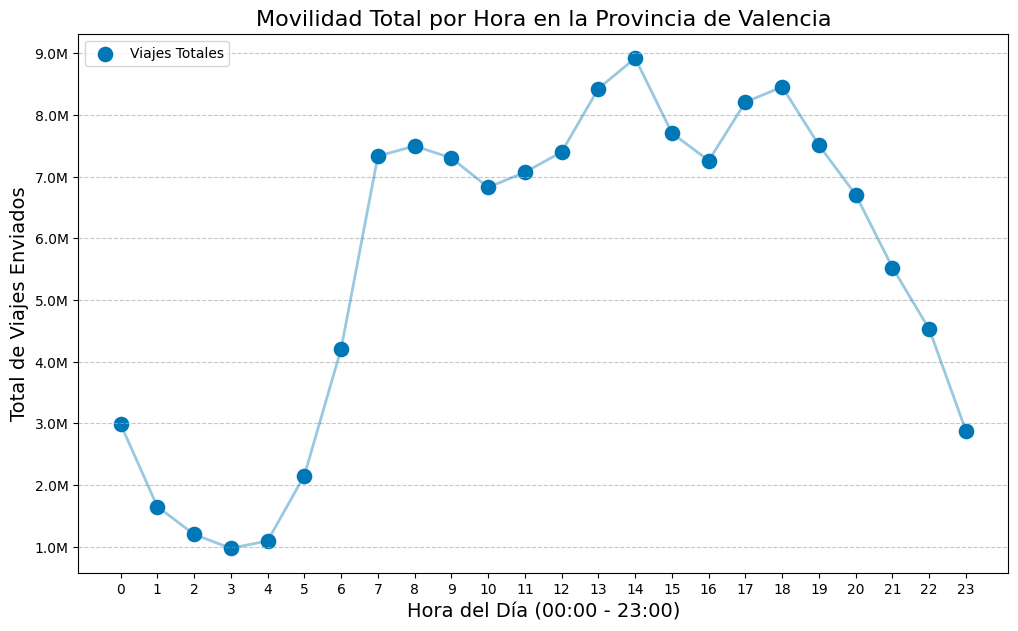

In [78]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# SQL para agregar los viajes por hora solo para la provincia de Valencia ('46')
sql_query = """
SELECT
    v.hour,
    SUM(v.n_trips) AS total_trips
FROM silver_integrated_od v
-- Unir con la tabla de provincias para filtrar por el nombre 'Valencia'
JOIN dim_provincias p
    ON SUBSTR(v.origin_code_mitma, 1, 2) = p.code
WHERE p.name = 'Valencia'
GROUP BY v.hour
ORDER BY v.hour
"""

# 1. Ejecutar la consulta y cargar en Pandas
df_valencia_hourly = con.execute(sql_query).df()

# 2. Creación del gráfico de puntos y línea
plt.figure(figsize=(12, 7))

# Configurar un formato para el eje Y (para números grandes)
def format_y_axis(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:1.1f}M'
    elif x >= 1e3:
        return f'{x*1e-3:1.0f}K'
    return f'{x:1.0f}'

# Gráfico de Puntos (Scatter Plot)
sns.scatterplot(
    x='hour',
    y='total_trips',
    data=df_valencia_hourly,
    s=150, 
    color='#0077B6',
    label='Viajes Totales'
)

# Añadir una línea para visualizar mejor la tendencia
sns.lineplot(
    x='hour',
    y='total_trips',
    data=df_valencia_hourly,
    color='#0077B6',
    alpha=0.4,
    linewidth=2
)

plt.title('Movilidad Total por Hora en la Provincia de Valencia', fontsize=16)
plt.xlabel('Hora del Día (00:00 - 23:00)', fontsize=14)
plt.ylabel('Total de Viajes Enviados', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))
plt.xticks(range(0, 24), rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

# Guardar el gráfico (mantener para documentación)
plt.savefig('valencia_hourly_mobility_scatter.png')

# ELIMINAMOS plt.close() para que Matplotlib muestre la figura en el output de la celda
# Si el código se ejecuta de esta forma en tu notebook, el gráfico aparecerá visiblemente.

In [ ]:
con.close()